In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms.functional as F
import torchvision.transforms as T

from skimage.io import imread, imsave, imshow
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgba2rgb
from skimage.transform import AffineTransform, warp


In [2]:
photo = "/velas_cilindricas_93bfafcc183a8e62a88a65b804b4f6ae.jpg_1.png"
folder = "/users/btorres/database/sketches"

img = imread(folder + photo)

imshow(img)

FileNotFoundError: No such file: '/users/btorres/database/sketches/velas_cilindricas_93bfafcc183a8e62a88a65b804b4f6ae.jpg_1.png'

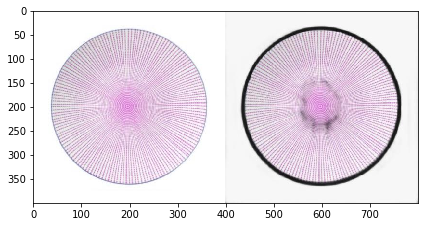

In [2]:
train = "/users/btorres/databases/ecommerce/train"
hues = "/users/btorres/databases/ecommerce/pidinet_color_quanta16_layer_10hues"

photo = "/vajillas/eaf77fbb4ff673f8d06a83162594cceb_9.jpg"

img1 = read_image(train + photo)
img2 = read_image(hues + photo)

rel = torch.cat([img1, img2], dim=2)

rel = rel.movedim(0, -1).numpy()

imshow(rel)

#for i in np.linspace(-0.5, 0.4, 10):
#    tensors.append(F.adjust_hue(img, i))


#img_hue = F.adjust_hue(img, -0.1)
#img_hue = F.adjust_brightness(img_hue, 0.2)
#img_hue = F.adjust_saturation(img_hue, 0.9)

#img_out = torch.cat(tensors,2)

#img = img.movedim(0, -1).numpy()
#img_out = img_out.movedim(0, -1).numpy()

#print(img_out.shape)
#imshow(img_out)
#imshow(img)

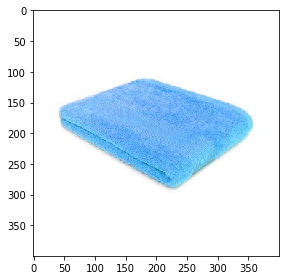

In [26]:
imshow(img)

torch.Size([3, 400, 400])


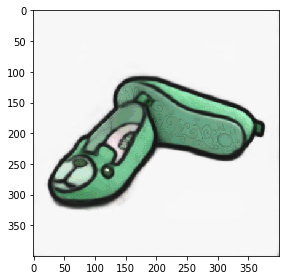

In [5]:
database = "/home/btorres/databases/n-ecommerce/pidinet_color_quanta16_layer"

img = "/zapatos/88247567cd8f30b19f368470f7943b3d_3.png"


imagen = read_image(database + img)

print(imagen.shape)

rel = imagen.movedim(0, -1).numpy()

imshow(rel)







In [7]:
def shift(image, vector):
    transform = AffineTransform(translation=vector)
    shifted = warp(image, transform, mode='wrap', preserve_range=True)

    shifted = shifted.astype(image.dtype)

    return shifted

In [11]:


path = '/users/btorres/database/sketches/'
save = '/users/btorres/database/sketches_jpg/'
for i, filename in enumerate(glob.glob(path + '*.png')):
    img = imread(filename)
    rgb = rgba2rgb(img)

    rgb = rgb / rgb.max() #normalizes img_grey in range 0 - 255
    rgb = 255 * rgb
    rgb = rgb.astype(np.uint8)


    guardar = save + os.path.basename(filename).split(".")[-2] + ".jpg"
    imsave( guardar, rgb)

    #os.rename(filename, filename.replace(".jpg", "_jpg"))


/tmp/ipykernel_1220676/2966115759.py:13: UserWarning: /users/btorres/database/sketches_jpg/manteles_0961e4e358a4dcaa8c29dc6ee533f321_jpg_1.jpg is a low contrast image
  imsave( guardar, rgb)
/tmp/ipykernel_1220676/2966115759.py:13: UserWarning: /users/btorres/database/sketches_jpg/luces_colgantes_e5c1737d245412f9bcc6df61f9510b19_jpg_1.jpg is a low contrast image
  imsave( guardar, rgb)
/tmp/ipykernel_1220676/2966115759.py:13: UserWarning: /users/btorres/database/sketches_jpg/bowl_8f1961edef9c2b68d019fa026fd3a1b5_jpg_1.jpg is a low contrast image
  imsave( guardar, rgb)
/tmp/ipykernel_1220676/2966115759.py:13: UserWarning: /users/btorres/database/sketches_jpg/accesorios_aseo_0445562aca316fb2e494580cba5c84dc_jpg_1.jpg is a low contrast image
  imsave( guardar, rgb)
/tmp/ipykernel_1220676/2966115759.py:13: UserWarning: /users/btorres/database/sketches_jpg/libros_d3c83d0a0fda4dc9997a40c8c996161c_jpg_1.jpg is a low contrast image
  imsave( guardar, rgb)
/tmp/ipykernel_1220676/2966115759.py:

In [18]:
path = '/users/btorres/database/sketches_jpg/'

for i, filename in enumerate(glob.glob(path + '*.jpg')):
    print(i)
    #os.rename(filename, filename.replace("2000360335864_2", "2000360335864-2"))
    #os.rename(filename, filename.replace("huevos_536_615", "huevos"))
    #os.rename(filename, filename.replace("lima_unas", "lima_uñas"))
    #os.rename(filename, filename.replace("munecas_y_animales", "muñecas_y_animales"))
    #os.rename(filename, filename.replace("panos_cocina", "paños_cocina"))
    os.rename(filename, filename.replace("velas_pequenas", "velas_pequeñas"))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
path = '/users/btorres/database/sketches_jpg/'

for i, filename in enumerate(glob.glob(path + '*.jpg')):
    guion = filename.split("_")
    class_name = "_".join(guion[:len(guion) - 3]).split("/")[-1]

    newpath = save + class_name + "/"
    if not os.path.exists(newpath[:-1]):
        print(class_name)
        os.makedirs(newpath)

    img = imread(filename)

    guardar = newpath + os.path.basename(filename)
    imsave( guardar, img)
    os.remove(filename)



sillas_terraza
lamparas_focos
camas_box_spring
sofas_futones_sofas_camas
cojines_cuello
mantas_toalla
pisos_poufs
portacepillo_de_dientes_1
cunas
toalla
tablas_picar
paños_cocina
mimbre_canastas_cestas
copas
bancas
cajas_madera
huevos
almohadas
estantes_organizadores
frascos_salero_pimientero
ampolleta
cajoneras_gabinetes_veladores
manteles
cuadernos_y_libretas
botellas_vidrio
avionetas
bandejas_2
bandejas_3
basureros_tapa
velas_esfericas
plato_de_arriba
sachet_aromatico
lamparas_focos_v2
delantales
taper
velas_rectangulares
cajas_perfume
cajas_y_canastos_grandes
calcetines_y_zapatos
batidor_resposteria
tenedor
jarras_floreros_frascos_vidrio
lima_uñas
adornos_figuras
canastos_cestas_sin_tapa
sillas_multiples
encrespador
guantes
lamparas_de_pie
guitarra
brochas_maquillaje
vasos_ceramica_portacepillo_de_dientes
portavelas
muñecas_y_animales
alfombras_redondas


/tmp/ipykernel_1220676/1992031223.py:15: UserWarning: /users/btorres/database/sketches_jpg/lamparas_focos/lamparas_focos_2632306_jpg_1.jpg is a low contrast image
  imsave( guardar, img)
/tmp/ipykernel_1220676/1992031223.py:15: UserWarning: /users/btorres/database/sketches_jpg/luces_colgantes/luces_colgantes_e5c1737d245412f9bcc6df61f9510b19_jpg_1.jpg is a low contrast image
  imsave( guardar, img)
/tmp/ipykernel_1220676/1992031223.py:15: UserWarning: /users/btorres/database/sketches_jpg/libros/libros_d3c83d0a0fda4dc9997a40c8c996161c_jpg_1.jpg is a low contrast image
  imsave( guardar, img)


vasos_con_tapa
camas_cajones
luces_colgantes
hielera
servilletero
libros
quitasoles_paraguas
figuras_insectos
lamparas_colgantes
plantas_maseteros
cortinas
portavelas_3
organizadores_joyas
lamparas_pantallas
jaulas
jabonera_jabon_barra
sillones
figuras_serpientes
cortinas_roller_y_persianas
vasos_vidrio
espumadera_espatulas
tijeras
tenazas_cocina
accesorios_aseo
tubo_colgador_toalla
babero
cajas_incienso
repisas
colchones
cortina_tubos
parrillas
manicure_cortacuticulas
estufas_v3
juegos_de_mesa


/tmp/ipykernel_1220676/1992031223.py:15: UserWarning: /users/btorres/database/sketches_jpg/accesorios_aseo/accesorios_aseo_0445562aca316fb2e494580cba5c84dc_jpg_1.jpg is a low contrast image
  imsave( guardar, img)


reposeras
spray
mantas_2
ollas
velas_cilindricas
libretas_anilladas
adornos_esferas_y_pelotas
respaldos
teclados_y_melodicas
embudos
cepillo_brochas_pinceles
comoda_rack_tv
teteras
repisas_2
servilletas
ventiladores
escritorios
lamparas
motos
tazones
marcos_cuadros
velas_largas
portacepillo_de_dientes_rectangular
plantas_maseteros_de_animales
cintillo
camarotes_y_camas_con_escritorio
baules_y_cajas
espejo
guantes_toma_ollas
estufas
mesas
sillas
mochilas
cobertores_y_plumones
bandejas_1
sartenes
antifaz
cortina_colgador
closet_zapateros_comodas
plato_de_costado
pescados
toalla_2
coladores
figuras_animales_mascaras_cabezas
estuches
portavelas_2
azucareros
pisos_sillas_sin_respaldo
cojines_2
bowl
alfombras_ovaladas
cojines


/tmp/ipykernel_1220676/1992031223.py:15: UserWarning: /users/btorres/database/sketches_jpg/bowl/bowl_8f1961edef9c2b68d019fa026fd3a1b5_jpg_1.jpg is a low contrast image
  imsave( guardar, img)


colgadores_ropa_2
autos_juguete
ropa
velas_pequeñas
sillas_escritorio_oficina
jabonera_jabon_liquido
estufas_v2
baldes_y_cubetas
rayadores
colgadores_ropa
accesorios_coctel
cuadros_oleos_carteles_adornos
basureros_papeleros_maseteros
lapices
cajas_carton
pantuflas
coctel_accesorios
figuras_animales
cocina_loza
organizadores_2
biombo_separador
posavasos
cortina_terminal_barra
cucharones_cucharas
adornos_piedras
camas_infantiles
tarros_frascos_metalicos_cilindricos
cafeteras
destapacorchos
cortina_abrazadores_1
cuchillos
fuentes_pocillos
figuras_dinosaurio_y_lagartos
relojes
percheros_y_colgadores
flauta
moldes
botellas
tarros
fruteros_verduleros_rejilla
caja_con_tapa
alfombras_rectangulares
alfombras_infantiles
bolsos_mano
flores
regaderas


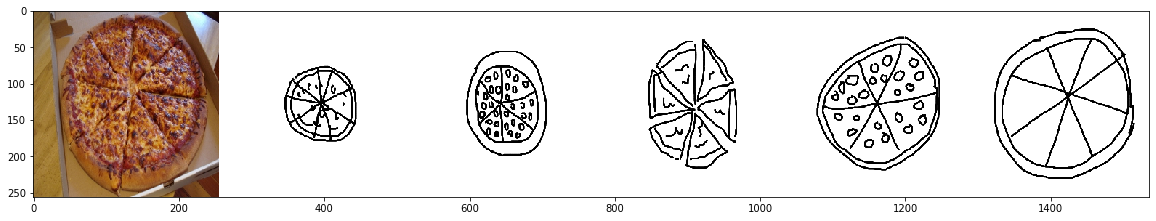

In [3]:
#sketchy
photo = ["photo/tx_000000000000/", "photo/tx_000100000000/"]
sketch = ["sketch/tx_000000000000/",  "sketch/tx_000000000110/", "sketch/tx_000000001110/",
          "sketch/tx_000000000010/",  "sketch/tx_000000001010/", "sketch/tx_000100000000/"]


sub = "/home/vision/smb-datasets/SBIR/sketchy/256x256/"

image = "pizza/n07873807_1952"


img = sub + photo[0] + image + ".jpg"
sketch = sub + sketch[3] + image

a = imread(img)
for i in range(1,6):
    b = imread(sketch + "-" + str(i) + ".png")
    a = np.concatenate((a,b), axis=1)


plt.figure(figsize = (20,4))
plt.imshow(a, interpolation='nearest')
#imshow(a)


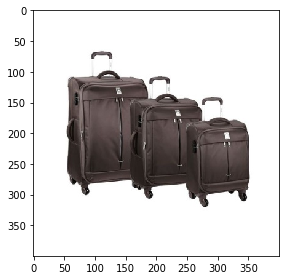

In [48]:
path_pidinet = "/home/vision/smb-datasets/ecommerce/ecommerce_pidinet/maletas"
path_sketches = "/home/vision/smb-datasets/ecommerce/sketches/train/maletas"
path_images = "/home/vision/smb-datasets/ecommerce/images/train/maletas"

path_test = "/users/btorres/databases/ecommerce/pidinet_color_cuantizado16/conjuntos"
img = "6695060a2c34f644ee96b61c3ac0e45e.jpg"

img_pidinet = imread(path_pidinet + "/" + img)
img_sketches = imread(path_sketches + "/" + img)
img_images = imread(path_images + "/" + img)

imshow(img_images)

In [49]:
def quant(img, cuant):
    cuant = 256 /cuant
    return (((img / cuant).astype(int) * cuant) + (cuant/2)).astype(int)




def blend(pidimg, imagen):

    alpha = pidimg / 255

    black = np.zeros(pidimg.shape) + 20
    rel = imagen

    rel[:,:,0] =  (alpha * imagen[:,:,0] + (1 - alpha) * black)
    rel[:,:,1] =  (alpha * imagen[:,:,1] + (1 - alpha) * black)
    rel[:,:,2] =  (alpha * imagen[:,:,2] + (1 - alpha) * black)

    return rel

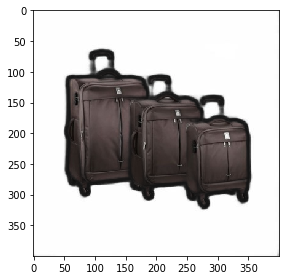

In [50]:
img_images = imread(path_images + "/" + img)
img_pidinet = imread(path_pidinet + "/" + img)

result = blend(img_pidinet, img_images)
imshow(result)

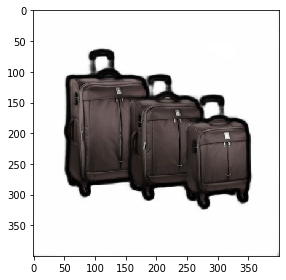

In [28]:
imshow(img_images)

In [107]:
q = quant(img_images, 16)

r = np.concatenate((q, np.expand_dims(img_pidinet, axis = 2)), axis=2)
print(r.shape)

(400, 400, 4)


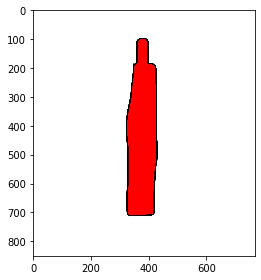

In [11]:
img = "/users/btorres/databases/color/sketches_jpg" + "/" + "velas_largas_31088cc8073703d9324353303b0643d5_jpg_1.jpg"
a = imread(img)
imshow(a)

(400, 400, 3)


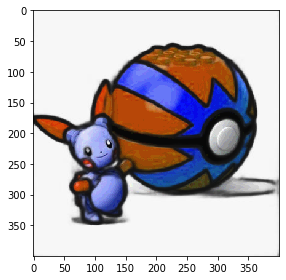

In [19]:
left = "/home/vision/smb-datasets/ecommerce/images/train"
pidinet = "/home/vision/smb-datasets/ecommerce/ecommerce_pidinet"
ecommerce_gaussian1 = "/users/btorres/databases/ecommerce/ecommerce_gaussian1"
ecommerce = "/home/vision/smb-datasets/ecommerce/images/train"
pidinet_gaussian1 = "/users/btorres/databases/ecommerce/pidinet_gaussian1"

pidinet_color = "/users/btorres/databases/ecommerce/pidinet_color_quanta16_layer"



imagen_l = "/pokemon/mtrgcm75_0_1.png" #49
imagen_r = "/pokemon/mtrgcm75_0_1.jpg"



l = imread(pidinet_color + imagen_l)


print(l.shape)

imshow(l)



/home/vision/smb-datasets/ecommerce/images/valid/mascaras


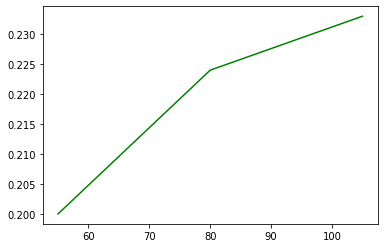

In [36]:
x = [55, 80 ,105]
y = [0.200, 0.224, 0.233]

plt.plot(x, y, color = 'green')


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

from skimage.io import imread, imsave, imshow


In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [19]:
example = "/users/btorres/database/ecommerce/images/train/munecas_barbie/f784177fa84500d01a327962b3243059.jpg"

image = cv2.imread(example)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

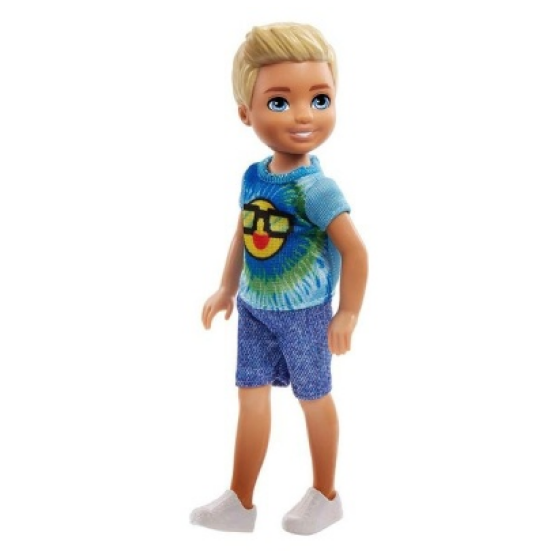

In [20]:

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [21]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/users/btorres/redesNeuronales/weightFiles/segmentation_models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [22]:
masks = mask_generator.generate(image)

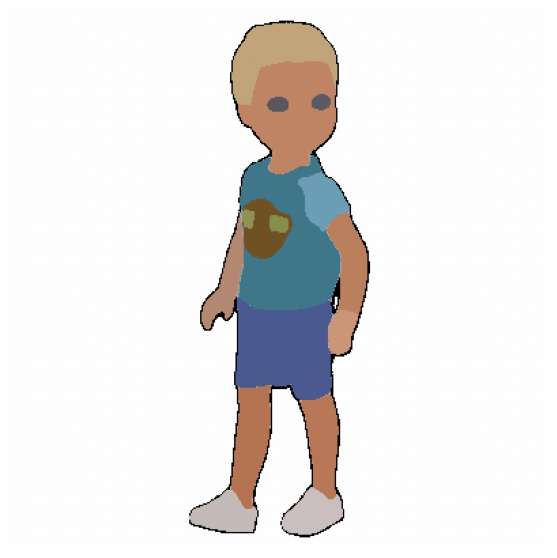

In [23]:
masks = mask_generator.generate(image)

sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=False)
resultado = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=int)

T = np.full((image.shape[0], image.shape[1]), False)


for i in range(len(sorted_anns)):

    M = sorted_anns[i]['segmentation']

    M = ~T & M
    T = M | T

    img = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=int)

    for j in range(3):
        img[:,:,j] = image[:,:,j]*(M*1.0)


    color = np.zeros((3,1))
    for j in range(3):
        a = img[:,:,j]
        color[j] = a[a!=0].mean()

    rel = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    for j in range(3):
        rel[:,:,j] = M*int(color[j][0])

    resultado = resultado + rel

resultado = resultado / 255


plt.figure(figsize=(10,10))
plt.imshow(resultado)
plt.axis('off')
plt.show()

In [16]:
dataDir = "/users/btorres/database/ecommerce/images/train/"
#pidinet = "/home/vision/smb-datasets/ecommerce/ecommerce_pidinet/"
saveTrain = "/users/btorres/database/ecommerce/segment/train/"
saveDir = "/users/btorres/database/ecommerce/segment/sketches/"

l = list(glob.glob(os.path.join(dataDir, '**')))

print(len(l[107:-1]))


33


In [17]:
o = 0
error = 0
for class_path in list(glob.glob(os.path.join(dataDir, '**')))[107:-1]:

    class_name = os.path.basename(class_path) + "/"

    newpath = saveDir + class_name
    if not os.path.exists(newpath[:-1]):
        os.makedirs(newpath)

    newpath = saveTrain + class_name
    if not os.path.exists(newpath[:-1]):
        os.makedirs(newpath)


    l = list(glob.iglob(os.path.join(class_path, '**')))
    max_images = int(len(l)/10)
    p = 0
    for sketch_path in l:

        if p > max_images:
            break


        image_name = os.path.basename(sketch_path)
        save_path = saveDir + class_name + "/" + image_name.split(".")[-2] + ".jpg"
        save_train = saveTrain + class_name + "/" + image_name.split(".")[-2] + ".jpg"

        image = imread(sketch_path)
        masks = mask_generator.generate(image)

        sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=False)
        resultado = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=int)

        T = np.full((image.shape[0], image.shape[1]), False)

        try:

            for i in range(len(sorted_anns)):

                M = sorted_anns[i]['segmentation']

                M = ~T & M
                T = M | T

                img = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=int)

                for j in range(3):
                    img[:,:,j] = image[:,:,j]*(M*1.0)



                color = np.zeros((3,1))
                for j in range(3):
                    a = img[:,:,j]
                    color[j] = a[a!=0].mean()

                rel = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
                for j in range(3):
                    rel[:,:,j] = M*int(color[j][0])

                resultado = resultado + rel

            resultado = resultado.astype(np.uint8)


            imsave(save_train, image)
            imsave(save_path, resultado)

        except:
            error += 1
            continue

        if (o % 10 == 0):

            sys.stdout.write('\r {} imágenes procesadas, clase: {}, {} errores'.format( o, class_name[0:-1], error))

        o += 1
        p += 1

 40 imágenes procesadas, clase: Platos, 0 errores, 0 errores

/tmp/ipykernel_1550931/4240632908.py:56: RuntimeWarning: Mean of empty slice.
  color[j] = a[a!=0].mean()
/users/btorres/redesNeuronales/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 940 imágenes procesadas, clase: flotadores_y_piscinas, 28 errores

/tmp/ipykernel_1550931/4240632908.py:68: UserWarning: /users/btorres/database/ecommerce/segment/sketches/flotadores_y_piscinas//4df31587e33259606d5c1ba05cab0b28_2.jpg is a low contrast image
  imsave(save_path, resultado)


 1260 imágenes procesadas, clase: cuchillos, 33 erroresesoresrores